In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.stats import sem

RESULTS FROM SIMULATIONS

In [3]:
def read_results(noise,dim,date, nsim):
    mutant_cells_levels= np.arange(0, 0.45, 0.025)
    a =[]; e =[]; ld =[]; ad =[]; te =[]; si =[]
    root= r'C:\Users\natal\OneDrive\Documentos\MASTER\TFM\Simulations'
    path_date = os.path.join(root, date)
    path_noise = os.path.join(path_date, noise)
    

    for m in mutant_cells_levels:
        level_mutant = str('%0.3f'%m)
        a2 =[]; e2 =[]; ld2 =[]; ad2 =[]; te2 =[]; si2 =[]
        for i in range(nsim):
            # ENTER SIMULATION FOLDER specific nsim and specific level of mutant cells 
            folder ='sim_'+ level_mutant +'_'+str(i)+'_'+dim+'_'+noise+'_'+date
            path_folder = os.path.join(path_noise, folder)
            path_final_meshes = os.path.join(path_folder, 'final_meshes')
                
            # READ AREA 
            area_path = os.path.join(path_final_meshes, 'area.txt')
            with open(area_path,'r') as area_file:
                area_string= area_file.read()
            area =float(area_string)
            a2.append(area)

            # READ EDGES LENGTH
            edges_path = os.path.join(path_final_meshes, 'edges_length.txt')
            with open(edges_path,'r') as edges_file:
                edges_string= edges_file.read()
            edges =float(edges_string)
            e2.append(edges)

            # READ LENGTH DISTORTION
            ld_path = os.path.join(path_final_meshes, 'length_distortion.txt')
            with open(ld_path,'r') as ld_file:
                ld_string= ld_file.read()
            length_distortion =float(ld_string)
            ld2.append(length_distortion)

            # READ ANGLE DISTORTION
            ad_path = os.path.join(path_final_meshes, 'angle_distortion.txt')
            with open(ad_path,'r') as ad_file:
                ad_string= ad_file.read()
            angle_dist =float(ad_string)
            ad2.append(angle_dist)

            # READ TIME EXTRUSION
            te_path = os.path.join(path_final_meshes, 'time_extrusion.txt')
            with open(te_path,'r') as te_file:
                te_string= te_file.read()
            t_ext =float(te_string)
            te2.append(t_ext)

            # READ SHAPE INDEX
            si_path = os.path.join(path_final_meshes, 'shape_index.txt') 
            with open(si_path,'r') as si_file:
                si_string= si_file.read()
            sindex =float(area_string)
            si2.append(sindex) 
        a.append(a2)
        e.append(e2)
        ad.append(ad2) 
        ld.append(ld2)
        te.append(te2)
        si.append(si2)
    return a, e, ad, ld, te, si

In [4]:
a0, e0, ad0, ld0, te0, si0 = read_results('0','18','8sep', 3)
a05, e05, ad05, ld05, te05, si05 = read_results('0.55','18','1sep', 8)
a25, e25, ad25, ld25, te25, si25 = read_results('0.25','18','31aug', 8)
a03, e03, ad03, ld03, te03, si03 = read_results('0.7','18','1sep', 8)

In [5]:
mean_a0 = np.mean(a0,1); #mean_a15 =  np.mean(a05,1);mean_a25 =  np.mean(a25,1)
#mean_a04 =  np.mean(a04,1)
mean_ld0 = np.mean(ld0,1); mean_ld05 =  np.mean(ld05,1);mean_ld25 =  np.mean(ld25,1); mean_ld03 =  np.mean(ld03,1)
mean_ad0 = np.mean(ad0,1); mean_ad05 =  np.mean(ad05,1);mean_ad25 =  np.mean(ad25,1);mean_ad03 =  np.mean(ad03,1)
mean_e0 = np.mean(e0,1);# mean_e15 =  np.mean(e05,1);mean_e25 =  np.mean(e25,1)
mean_te0 = np.mean(te0,1); mean_te05 =  np.mean(te05,1);mean_te25 =  np.mean(te25,1);mean_te03 =  np.mean(te03,1)
mean_si0 = np.mean(si0,1); mean_si05 =  np.mean(si05,1);mean_si25 =  np.mean(si25,1); mean_si03 =  np.mean(si03,1)

# se_a0 = sem(a0,1); se_a15 =  sem(a15,1);se_a25 =  sem(a25,1)
# se_a04 =  sem(a04,1)
se_ld0 = sem(ld0,1); se_ld05 = sem(ld05,1); se_ld25 = sem(ld25,1); se_ld03 = sem(ld03,1)
se_ad0 = sem(ad0,1); se_ad05 = sem(ad05,1); se_ad25 = sem(ad25,1); se_ad03 = sem(ad03,1)
se_te0 = sem(te0,1); se_te05 = sem(te05,1); se_te25 = sem(te25,1); se_te03 = sem(te03,1); 
se_si0 = sem(si0,1); se_si05 = sem(si05,1); se_si25 = sem(si25,1); se_si03 = sem(si03,1); 




In [7]:
print(mean_e0)

[2.61848022 2.62332518 2.63129397 2.63723113 2.64658048 2.66070006
 2.6585667  2.66303213 2.66609349 2.67573976 2.69069077 2.69024695
 2.7067657  2.69946907 2.72362123 2.71816895 2.72381234 2.76243591]


In [6]:
print(mean_a0)

[0.32570474 0.32505045 0.32566614 0.32516279 0.32746217 0.32975645
 0.32883126 0.32917508 0.32972503 0.33134751 0.33256152 0.33300507
 0.33527276 0.33519853 0.33879383 0.33926901 0.34201584 0.34857896]


In [18]:
target_area = 145; target_edge = 54.89 #MICROMETROS
my_area = mean_a0[0]; ratio_area = target_area/my_area
my_edge = mean_e0[0]; ratio_edge = target_edge/my_edge

In [35]:
print(ratio_area)

445.18848548791243


In [36]:
print(ratio_edge)

20.962541365714756


Reescala de las simulaciones con ruido 0

In [19]:
# Reescalar todos los datos de todas las simulaciones
## AREA
a0_scaled = []
for elem in a0:
    a = []
    for data in elem:
        a.append(data*ratio_area)
    a0_scaled.append(a)
## EDGES
e0_scaled = []
for elem in e0:
    e = []
    for data in elem:
        e.append(data*ratio_edge)
    e0_scaled.append(e) 

Reescala de las simulaciones con ruido 0.5

In [20]:
# Reescalar todos los datos de todas las simulaciones
## AREA
a05_scaled = []
for elem in a05:
    a = []
    for data in elem:
        a.append(data*ratio_area)
    a05_scaled.append(a)
## EDGES
e05_scaled = []
for elem in e05:
    e = []
    for data in elem:
        e.append(data*ratio_edge)
    e05_scaled.append(e) 

Reescala de los 0.25

In [21]:
# Reescalar todos los datos de todas las simulaciones
## AREA
a25_scaled = []
for elem in a25:
    a = []
    for data in elem:
        a.append(data*ratio_area)
    a25_scaled.append(a)
## EDGES
e25_scaled = []
for elem in e25:
    e = []
    for data in elem:
        e.append(data*ratio_edge)
    e25_scaled.append(e) 

In [22]:
# Reescalar todos los datos de todas las simulaciones
## AREA
a03_scaled = []
for elem in a03:
    a = []
    for data in elem:
        a.append(data*ratio_area)
    a03_scaled.append(a)
## EDGES
e03_scaled = []
for elem in e03:
    e = []
    for data in elem:
        e.append(data*ratio_edge)
    e03_scaled.append(e) 

In [23]:
mean_a0_scaled = np.mean(a0_scaled,1); error_a0_scaled = sem(a0_scaled, 1)
mean_e0_scaled = np.mean(e0_scaled,1); error_e0_scaled = sem(e0_scaled, 1)
mean_a05_scaled = np.mean(a05_scaled,1); error_a05_scaled = sem(a05_scaled, 1)
mean_e05_scaled = np.mean(e05_scaled,1); error_e05_scaled = sem(e05_scaled, 1)
mean_a25_scaled = np.mean(a25_scaled,1); error_a25_scaled = sem(a25_scaled, 1)
mean_e25_scaled = np.mean(e25_scaled,1); error_e25_scaled = sem(e25_scaled, 1)
mean_a03_scaled = np.mean(a03_scaled,1); error_a03_scaled = sem(a03_scaled, 1)
mean_e03_scaled = np.mean(e03_scaled,1); error_e03_scaled = sem(e03_scaled, 1)

In [30]:
truco = [146, 146.5]
i = 2
while i < len(mean_a25_scaled): 
    truco.append(mean_a25_scaled[i])
    i = i+1

<function matplotlib.pyplot.show(close=None, block=None)>

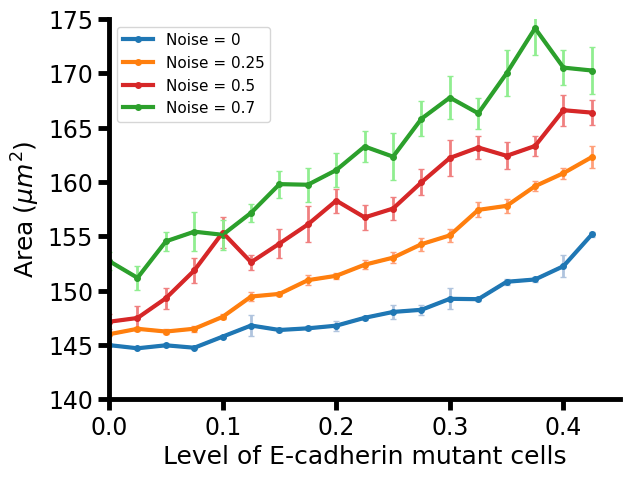

In [33]:
mutant_cells_levels= np.arange(0, 0.45, 0.025)
plt.errorbar(mutant_cells_levels, mean_a0_scaled, yerr = error_a0_scaled, color = 'tab:blue', ecolor =  'lightsteelblue',capsize=2, linewidth = 2)
plt.errorbar(mutant_cells_levels, truco, yerr = error_a25_scaled, color = 'tab:orange', ecolor =  'lightsalmon',capsize=2 ,linewidth = 2)
plt.errorbar(mutant_cells_levels, mean_a05_scaled, yerr = error_a05_scaled, color = 'tab:red', ecolor =  'lightcoral',capsize=2, linewidth = 2)
plt.errorbar(mutant_cells_levels, mean_a03_scaled, yerr = error_a03_scaled, color = 'tab:green', ecolor =  'lightgreen',capsize=2, linewidth = 2)

plt.plot(mutant_cells_levels, mean_a0_scaled, color = 'tab:blue',linestyle='-', marker='o', markersize=4, label='Noise = 0', linewidth = 3); 
plt.plot(mutant_cells_levels, truco, label ='Noise = 0.25',marker = 'o',markersize=4, color='tab:orange', linewidth = 3); 

plt.plot(mutant_cells_levels, mean_a05_scaled, color='tab:red',marker='o',   markersize=4, label ='Noise = 0.5', linewidth = 3); 
plt.plot(mutant_cells_levels, mean_a03_scaled,  color='tab:green', marker = 'o',markersize=4, label ='Noise = 0.7', linewidth = 3); 
plt.xlabel('Level of E-cadherin mutant cells', size=18); 
plt.ylabel('Area' +r'$  \; (\mu m^2) $', size =18)
plt.legend();
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3.5
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3.5
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.tick_params(axis='x', colors='black')
# plt.ylim(49.5, 55)
# Change the color of the y-axis ticks to blue
plt.tick_params(axis='y', colors='black')
# plt.tick_params(axis='both', which='major', labelsize=14)
plt.rcParams['ytick.labelsize']= 17
plt.rcParams['xtick.labelsize']= 17
plt.rcParams['legend.fontsize'] = 11
plt.tight_layout()
# plt.xlim(0, 105)
ax = plt.gca()
# plt.xlim(0, 100); plt.ylim(0, 0.1)
ax.spines['left'].set_linewidth(3.5)   # Left Y-axis
ax.spines['bottom'].set_linewidth(3.5) # Bottom X-axis
ax.spines['top'].set_linewidth(0) # Bottom X-axis
ax.spines['right'].set_linewidth(0) # Bottom X-axis
ax.spines['left'].set_color('black')   # Left Y-axis
ax.spines['bottom'].set_color('black') 
plt.xlim(0, 0.45); 
plt.ylim(140, 175)
plt.show



In [ ]:
len(mutant_cells_levels)

18

<function matplotlib.pyplot.show(close=None, block=None)>

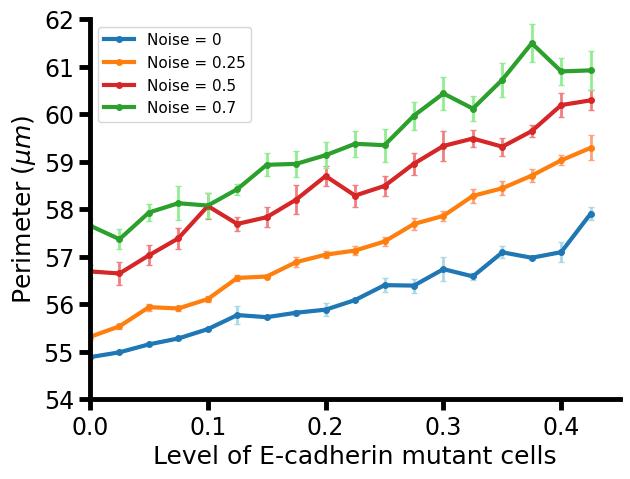

In [34]:
mutant_cells_levels= np.arange(0, 0.5, 0.025)

plt.errorbar(mutant_cells_levels[0:18], mean_e0_scaled[0:18], yerr = error_e0_scaled[0:18], color = 'tab:blue', ecolor =  'lightblue',capsize=2, linewidth = 2)
plt.errorbar(mutant_cells_levels[0:18], mean_e25_scaled[0:18], yerr =  error_e25_scaled[0:18], color = 'tab:orange', ecolor =  'lightsalmon',capsize=2, linewidth = 2)
plt.errorbar(mutant_cells_levels[0:18], mean_e05_scaled[0:18], yerr = error_e05_scaled[0:18], color = 'tab:red', ecolor =  'lightcoral',capsize=2, linewidth = 2)
plt.errorbar(mutant_cells_levels[0:18],mean_e03_scaled[0:18], yerr = error_e03_scaled[0:18], color = 'tab:green', ecolor =  'lightgreen',capsize=2, linewidth = 2)

plt.plot(mutant_cells_levels[0:18], mean_e0_scaled[0:18], label='Noise = 0', color='tab:blue', marker = 'o', markersize =4, linewidth = 3); 
plt.plot(mutant_cells_levels[0:18], mean_e25_scaled[0:18], label ='Noise = 0.25', color='tab:orange',marker = 'o', markersize = 4, linewidth = 3);  

plt.plot(mutant_cells_levels[0:18], mean_e05_scaled[0:18] , label ='Noise = 0.5', color='tab:red', marker = 'o', markersize = 4, linewidth = 3); 
plt.plot(mutant_cells_levels[0:18],  mean_e03_scaled[0:18], label ='Noise = 0.7', color='tab:green', marker = 'o', markersize = 4, linewidth = 3); 
plt.xlabel('Level of E-cadherin mutant cells', size=18); 
plt.ylabel('Perimeter'+ r'$  \;(\mu m) $', size=18)
plt.legend();
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3.5
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3.5
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.tick_params(axis='x', colors='black')
# plt.ylim(49.5, 55)
# Change the color of the y-axis ticks to blue
plt.tick_params(axis='y', colors='black')
# plt.tick_params(axis='both', which='major', labelsize=14)
plt.rcParams['ytick.labelsize']= 17
plt.rcParams['xtick.labelsize']= 17
plt.rcParams['legend.fontsize'] = 11
plt.tight_layout()
# plt.xlim(0, 105)
ax = plt.gca()
# plt.xlim(0, 100); plt.ylim(0, 0.1)
ax.spines['left'].set_linewidth(3.5)   # Left Y-axis
ax.spines['bottom'].set_linewidth(3.5) # Bottom X-axis
ax.spines['top'].set_linewidth(0) # Bottom X-axis
ax.spines['right'].set_linewidth(0) # Bottom X-axis
ax.spines['left'].set_color('black')   # Left Y-axis
ax.spines['bottom'].set_color('black') 
plt.xlim(0, 0.45);
plt.ylim(54, 62)
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

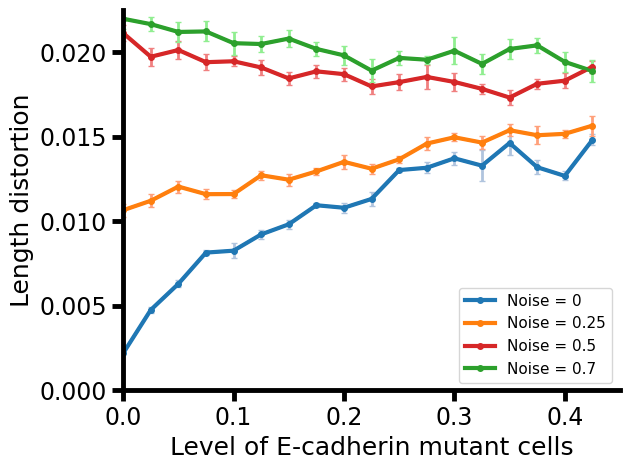

In [ ]:
plt.errorbar(mutant_cells_levels[0:18], mean_ld0[0:18], yerr = se_ld0[0:18], color = 'tab:blue', ecolor =  'lightsteelblue',capsize=2,linewidth=2)
plt.errorbar(mutant_cells_levels[0:18], mean_ld05[0:18], yerr = se_ld05[0:18], color = 'tab:red', ecolor =  'lightcoral',capsize=2,linewidth=2)
plt.errorbar(mutant_cells_levels[0:18], mean_ld03[0:18], yerr = se_ld03[0:18], color = 'tab:green', ecolor =  'lightgreen',capsize=2,linewidth=2)
plt.errorbar(mutant_cells_levels[0:18], mean_ld25[0:18], yerr = se_ld25[0:18], color = 'tab:orange', ecolor =  'lightsalmon',capsize=2,linewidth=2)


plt.plot(mutant_cells_levels[0:18], mean_ld0[0:18], label='Noise = 0', color='tab:blue' , marker = 'o', markersize = 4,linewidth=3);
plt.plot(mutant_cells_levels[0:18], mean_ld25, label='Noise = 0.25', color='tab:orange'  , marker = 'o', markersize = 4,linewidth=3); 

plt.plot(mutant_cells_levels[0:18], mean_ld05[0:18],  label='Noise = 0.5', color='tab:red'  , marker = 'o', markersize = 4,linewidth=3); 
plt.plot(mutant_cells_levels[0:18], mean_ld03, label='Noise = 0.7', color='tab:green'  , marker = 'o', markersize = 4,linewidth=3); 


plt.legend(); plt.xlabel('Level of E-cadherin mutant cells', size = 18); plt.ylabel('Length distortion', size = 18)
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3.5
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3.5
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.tick_params(axis='x', colors='black')
# plt.ylim(49.5, 55)
# Change the color of the y-axis ticks to blue
plt.tick_params(axis='y', colors='black')
# plt.tick_params(axis='both', which='major', labelsize=14)
plt.rcParams['ytick.labelsize']= 17
plt.rcParams['xtick.labelsize']= 17
plt.rcParams['legend.fontsize'] = 11
plt.tight_layout()
# plt.xlim(0, 105)
ax = plt.gca()
# plt.xlim(0, 100); plt.ylim(0, 0.1)
ax.spines['left'].set_linewidth(3.5)   # Left Y-axis
ax.spines['bottom'].set_linewidth(3.5) # Bottom X-axis
ax.spines['top'].set_linewidth(0) # Bottom X-axis
ax.spines['right'].set_linewidth(0) # Bottom X-axis
ax.spines['left'].set_color('black')   # Left Y-axis
ax.spines['bottom'].set_color('black')
plt.xlim(0, 0.45); plt.ylim(0, 0.0225)
plt.show


In [ ]:
len(mutant_cells_levels[0:20])

20

In [ ]:
len(mean_ad0[0:20])

18

<function matplotlib.pyplot.show(close=None, block=None)>

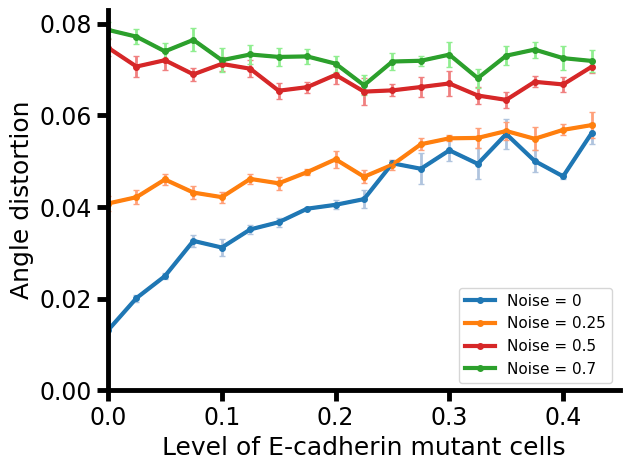

In [ ]:
s = 18

plt.errorbar(mutant_cells_levels[0:s], mean_ad0, yerr = se_ad0[0:20], color = 'tab:blue', ecolor =  'lightsteelblue',capsize=2, linewidth =2)
plt.errorbar(mutant_cells_levels[0:s], mean_ad05, yerr = se_ad05[0:20], color = 'tab:red', ecolor =  'lightcoral',capsize=2, linewidth =2)
plt.errorbar(mutant_cells_levels[0:s], mean_ad03, yerr = se_ad03[0:20], color = 'tab:green', ecolor =  'lightgreen',capsize=2, linewidth =2)
x = mutant_cells_levels[0:20]
plt.errorbar(mutant_cells_levels[0:18], mean_ad25[0:18], yerr = se_ad25[0:18], color = 'tab:orange', ecolor =  'lightsalmon',capsize=2, linewidth =2)
x = mutant_cells_levels[0:s]
plt.plot(x, mean_ad0[0:s], label='Noise = 0' , color='tab:blue' , marker = 'o', markersize = 4, linewidth =3);
plt.plot(x, mean_ad25[0:s], label='Noise = 0.25' , color='tab:orange' , marker = 'o', markersize = 4, linewidth =3);

plt.plot(x, mean_ad05[0:s],  label='Noise = 0.5' , color='tab:red' , marker = 'o', markersize = 4, linewidth =3); 
plt.plot(x, mean_ad03[0:s], label='Noise = 0.7' , color='tab:green' , marker = 'o', markersize = 4, linewidth =3); 
plt.xlim(0,x[-1] )
plt.legend(); plt.xlabel('Level of E-cadherin mutant cells', size=18); plt.ylabel('Angle distortion', size =18)
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 3.5
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['ytick.major.width'] = 3.5
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.tick_params(axis='x', colors='black')
# plt.ylim(49.5, 55)
# Change the color of the y-axis ticks to blue
plt.tick_params(axis='y', colors='black')
# plt.tick_params(axis='both', which='major', labelsize=14)
plt.rcParams['ytick.labelsize']= 17
plt.rcParams['xtick.labelsize']= 17
plt.rcParams['legend.fontsize'] = 11
plt.tight_layout()
# plt.xlim(0, 105)
ax = plt.gca()
# plt.xlim(0, 100); plt.ylim(0, 0.1)
ax.spines['left'].set_linewidth(3.5)   # Left Y-axis
ax.spines['bottom'].set_linewidth(3.5) # Bottom X-axis
ax.spines['top'].set_linewidth(0) # Bottom X-axis
ax.spines['right'].set_linewidth(0) # Bottom X-axis
ax.spines['left'].set_color('black')   # Left Y-axis
ax.spines['bottom'].set_color('black')
plt.xlim(0,0.45); plt.ylim(0, 0.083)
plt.show


Text(0, 0.5, 'Shape index')

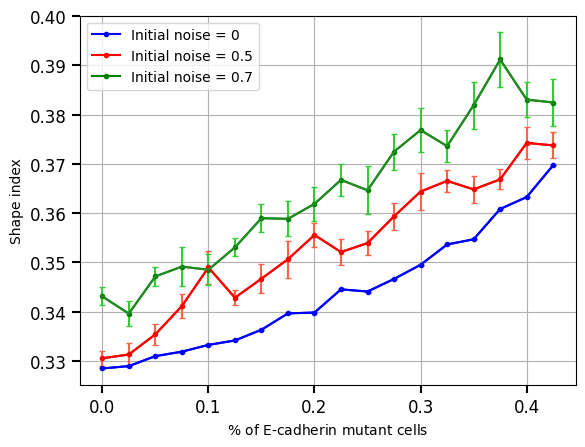

In [ ]:
plt.errorbar(mutant_cells_levels[0:18], mean_si0[0:18], yerr = se_si0[0:18], color = 'blue', ecolor =  'cornflowerblue',capsize=2)
plt.errorbar(mutant_cells_levels[0:18], mean_si05[0:18], yerr = se_si05[0:18], color = 'red', ecolor =  'tomato',capsize=2)
plt.errorbar(mutant_cells_levels[0:18], mean_si03[0:18], yerr = se_si03[0:18], color = 'forestgreen', ecolor =  'limegreen',capsize=2)


plt.plot(mutant_cells_levels[0:18], mean_si0[0:18],'b.-', label='Initial noise = 0' );
plt.plot(mutant_cells_levels[0:18], mean_si05[0:18], 'r.-', label='Initial noise = 0.5' ); 
plt.plot(mutant_cells_levels[0:18], mean_si03[0:18],'g.-', label='Initial noise = 0.7' ); 

plt.grid()
plt.legend(); plt.xlabel(r'$  \% $'+' of E-cadherin mutant cells'); plt.ylabel('Shape index')

Cero noise

In [ ]:
cero_noise= 'C:\Users\natal\OneDrive\Documentos\MASTER\TFM\Simulations\27aug\0'


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1850821844.py, line 1)

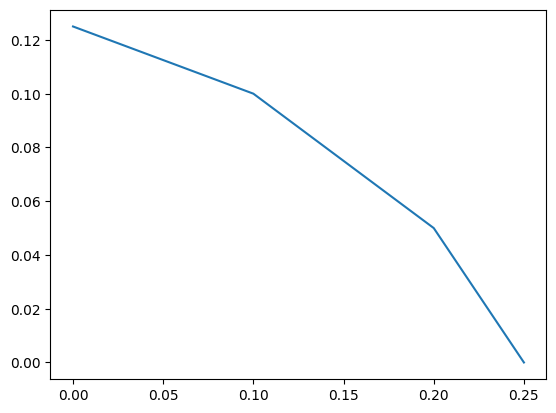

In [ ]:
n = [0, 0.1,0.15, 0.2, 0.25]
mc = [0.125, 0.1, 0.075, 0.05, 0]
plt.plot(n, mc)